# Project Two

by Shawn Rich, November 7, 2015

This is the project notebook for Week 2 of The Open University's [Learn to code for Data Analysis](https://www.futurelearn.com/learn-to-code) course.

My home is in Lansing, Michigan USA. In this project, I will explore data from 2014 for Lansing. Which two weeks last year were best? My preference are milder temperatures and low humidity.

## Getting the Data

First get the data from the Weather Underground website. Here are the steps I took:

1. Goto [Weather Undergroup History and Data Archive](http://www.wunderground.com/history/)
1. Enter *Lansing, Michigan* in the location search box and submit.
1. Click on the Custom tab and enter date range from January 1, 2014 to December 31, 2014 and click Get History button
1. Scroll to bottom of page and save the csv data to Lansing_2014.csv.

Now we can read in the data into a data frame.


In [7]:
from pandas import *
lansing = read_csv('Lansing_2014.csv', skipinitialspace=True)

## Cleaning the Data

Before we can start exploring the data to find warm non humid days, we will do a little cleanup of the data.

In [8]:
lansing.head()

,EST,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,14,12,9,9,4,0,88,76,63,...,10,4,1,17,9,22,0.08,8,Snow,43<br />
1,2014-1-2,13,5,-3,7,4,-8,76,70,63,...,9,4,0,22,13,30,0.01,7,Snow,24<br />
2,2014-1-3,13,1,-11,2,-5,-14,83,68,53,...,10,10,5,23,10,32,0.00,1,Snow,205<br />
3,2014-1-4,31,22,13,27,18,3,92,73,53,...,10,6,1,28,15,36,0.12,5,Snow,203<br />
4,2014-1-5,29,23,16,27,21,11,92,86,80,...,4,1,0,22,11,30,0.78,8,Fog-Snow,9<br />


By scrolling the above table to the right, we see that each row ends with &lt;br /&gt; tag. This happened when we download the data from the WU web site. Let's get ride of all of those.

In [9]:
lansing = lansing.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})
lansing['WindDirDegrees'] = lansing['WindDirDegrees'].str.rstrip('<br />')

Now lets change some of the column datatypes.
1. Change 'WindDirDegrees' to float64
1. Change 'GMT' column into values of the datetime64 date type.
1. Change the index from the default to the datetime64 values in the 'GMT'. This is done so that it is easier to pull out rows between particular dates and display more meaningful graphs.

In [10]:
lansing['WindDirDegrees'] = lansing['WindDirDegrees'].astype('float64')
lansing['EST'] = to_datetime(lansing['EST'])
lansing.index = lansing['EST']

## Finding a Break

Autumn in Michigan is beatiful and can have temperatures and humidity that I like. So, we limit our search to September through November.

In [11]:
autumn = lansing.ix[datetime(2014,9,1) : datetime(2014,11,30)]

Let's look at temperatures and humidity.

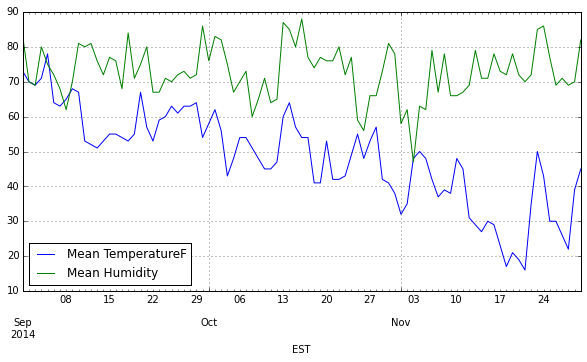

In [12]:
# tell Jupyter to display graphs inline
%matplotlib inline

# plot mean temperature and humidity
autumn[['Mean TemperatureF','Mean Humidity']].plot(grid=True, figsize=(10,5))


## Conculsion

The last two weeks in September and the first week of October look really nice. I also like the falls colors of the leaves turning. That generally does not happen until mid October. I think I will risk temperatures in the 50s and plan my vacation for second two weeks in October.